In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.statespace.sarimax as sarima
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/drive/My Drive/GC_ARIMA.csv', index_col='Date', parse_dates=True)
df=df.iloc[:73]
df

,Cases
Date,
20-04-20,455.0
21-04-20,236.0
22-04-20,391.0
23-04-20,360.0
24-04-20,479.0
...,...
27-06-20,5882.0
28-06-20,1665.0
29-06-20,5191.0


In [4]:
train = df['02-06-20':'17-06-20']
test = df['17-06-20':]

In [9]:
D1train= sarima.SARIMAX(train, order=(3,0,1), trend='c').fit(disp=1)
forecast= D1train.forecast(steps=len(test))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


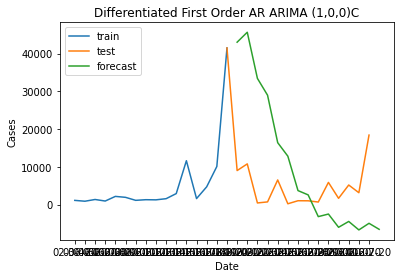

In [10]:
fig1, ax = plt.subplots()
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.plot(forecast, label='forecast')
plt.legend(loc='upper left')
plt.title("Differentiated First Order AR ARIMA (1,0,0)C")
plt.ylabel('Cases')
plt.xlabel('Date')
plt.show()